In [ ]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt

In [ ]:
#data.csv needs to be uploaded into the Files section on the left
data = pd.read_csv('data.csv')

In [ ]:
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [ ]:
print(data.shape) #shape of data
print(data.columns) #columns of data

(569, 33)
Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')


In [ ]:
#Explore all the columns of data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

#### Attribute Information: ####

1) ID number
2) Diagnosis (M = malignant, B = benign)
3-32)

Ten real-valued features are computed for each cell nucleus:

a) radius (mean of distances from center to points on the perimeter)
b) texture (standard deviation of gray-scale values)
c) perimeter
d) area
e) smoothness (local variation in radius lengths)
f) compactness (perimeter^2 / area - 1.0)
g) concavity (severity of concave portions of the contour)
h) concave points (number of concave portions of the contour)
i) symmetry
j) fractal dimension ("coastline approximation" - 1)

The mean, standard error and "worst" or largest (mean of the three
largest values) of these features were computed for each image,
resulting in 30 features. For instance, field 3 is Mean Radius, field
13 is Radius SE, field 23 is Worst Radius.

All feature values are recoded with four significant digits.

Missing attribute values: none

Class distribution: 357 benign, 212 malignant

In [ ]:
#Statistics of data
data.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,0.405172,1.216853,2.866059,40.337079,0.007041,0.025478,0.031894,0.011796,0.020542,0.003795,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,0.277313,0.551648,2.021855,45.491006,0.003003,0.017908,0.030186,0.006170,0.008266,0.002646,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,0.111500,0.360200,0.757000,6.802000,0.001713,0.002252,0.000000,0.000000,0.007882,0.000895,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,0.232400,0.833900,1.606000,17.850000,0.005169,0.013080,0.015090,0.007638,0.015160,0.002248,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,0.324200,1.108000,2.287000,24.530000,0.006380,0.020450,0.025890,0.010930,0.018730,0.003187,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,0.478900,1.474000,3.357000,45.190000,0.008146,0.032450,0.042050,0.014710,0.023480,0.004558,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,2.873000,4.885000,21.980000,542.200000,0.031130,0.135400,0.396000,0.052790,0.078950,0.029840,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


In [ ]:
data['Unnamed: 32'].unique() #This column is all Nans, can be dropped 

array([nan])

In [ ]:
#Split data into features (X) and target variable (y)
#Drop columns: Unnamed: 32 and id since aren't relevant

todrop = ['id', 'Unnamed: 32', 'diagnosis']
X = data.drop(todrop, axis = 1)
X.head()
y = data['diagnosis'].map({'M':1,'B':0}) #Convert Malignant and Benign labels to binary, Malignant = 1 and Benign = 0  

Number of Benign: 357
Number of Malignant: 212


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


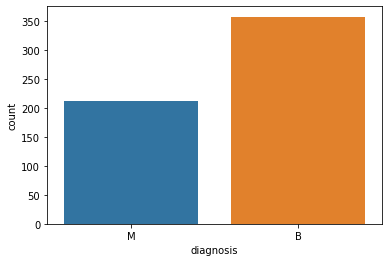

In [ ]:
#How many Malignant and Benign datapoints in the dataset
sns.countplot(data['diagnosis'],label="Count");

benign, malignant =  y.value_counts()
print('Number of Benign:', benign)
print('Number of Malignant:', malignant)

### Data Visualization ###


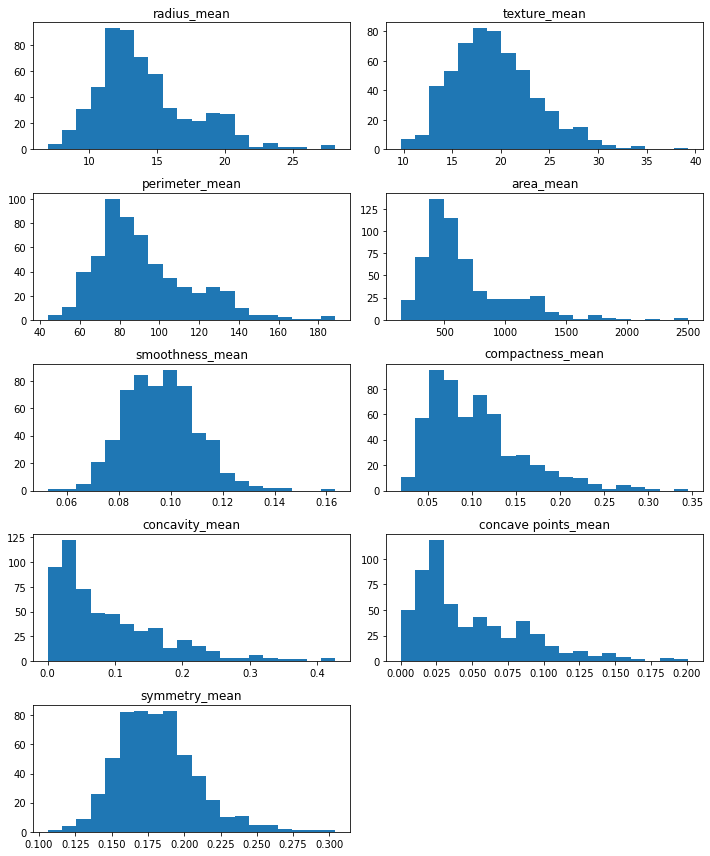

In [ ]:
data.iloc[:,1:11].hist(figsize=(10,12), bins=20, layout=(5,2), grid=False)
plt.tight_layout()
# plot the distribution for each feature and look for skewness on the mean values

In [ ]:
# It's obvious that features like concavity and area are largely skewed.
skewness = data.iloc[:,1:11].skew()
skewness

radius_mean            0.942380
texture_mean           0.650450
perimeter_mean         0.990650
area_mean              1.645732
smoothness_mean        0.456324
compactness_mean       1.190123
concavity_mean         1.401180
concave points_mean    1.171180
symmetry_mean          0.725609
dtype: float64

In [ ]:
# normalize the data
X_norm = (X - X.mean()) / (X.std())
X_norm.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1.096100,-2.071512,1.268817,0.983510,1.567087,3.280628,2.650542,2.530249,2.215566,2.253764,2.487545,-0.564768,2.830540,2.485391,-0.213814,1.315704,0.723390,0.660239,1.147747,0.906286,1.885031,-1.358098,2.301575,1.999478,1.306537,2.614365,2.107672,2.294058,2.748204,1.935312
1,1.828212,-0.353322,1.684473,1.907030,-0.826235,-0.486643,-0.023825,0.547662,0.001391,-0.867889,0.498816,-0.875473,0.263095,0.741749,-0.604819,-0.692317,-0.440393,0.259933,-0.804742,-0.099356,1.804340,-0.368879,1.533776,1.888827,-0.375282,-0.430066,-0.146620,1.086129,-0.243675,0.280943
2,1.578499,0.455786,1.565126,1.557513,0.941382,1.052000,1.362280,2.035440,0.938859,-0.397658,1.227596,-0.779398,0.850180,1.180298,-0.296744,0.814257,0.212889,1.423575,0.236827,0.293301,1.510541,-0.023953,1.346291,1.455004,0.526944,1.081980,0.854222,1.953282,1.151242,0.201214
3,-0.768233,0.253509,-0.592166,-0.763792,3.280667,3.399917,1.914213,1.450431,2.864862,4.906602,0.326087,-0.110312,0.286341,-0.288125,0.689095,2.741868,0.818798,1.114027,4.728520,2.045711,-0.281217,0.133866,-0.249720,-0.549538,3.391291,3.889975,1.987839,2.173873,6.040726,4.930672
4,1.748758,-1.150804,1.775011,1.824624,0.280125,0.538866,1.369806,1.427237,-0.009552,-0.561956,1.269426,-0.789549,1.272070,1.189310,1.481763,-0.048477,0.827742,1.143199,-0.360775,0.498889,1.297434,-1.465481,1.337363,1.219651,0.220362,-0.313119,0.612640,0.728618,-0.867590,-0.396751


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

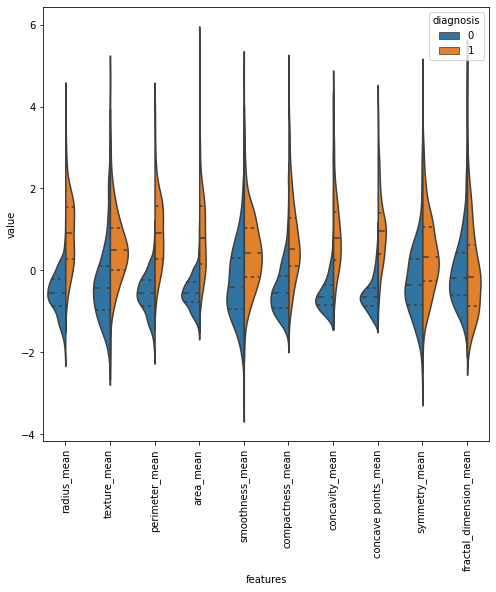

In [ ]:
data = pd.concat([y,X_norm.iloc[:,0:10]],axis=1)
data = pd.melt(data,id_vars="diagnosis",
                    var_name="features",
                    value_name='value')
plt.figure(figsize=(8,8))
sns.violinplot(x="features", y="value", hue="diagnosis", data=data,split=True, inner="quart")
plt.xticks(rotation=90)

From the above violin plot, we can see that the median of Malignant and Benign for concave points and perimeter are quite different, indicating that these would be good features for classification.

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

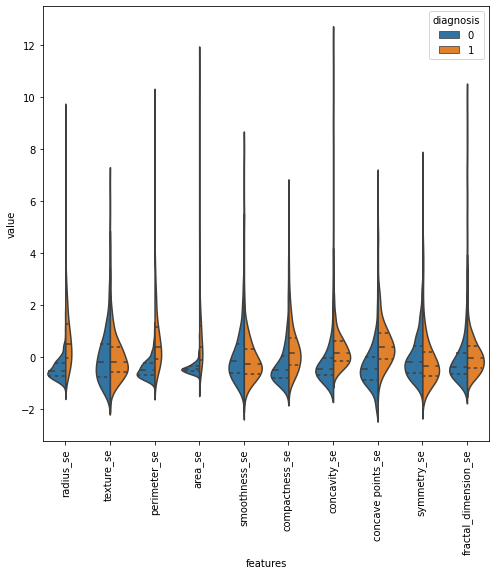

In [ ]:
data = pd.concat([y,X_norm.iloc[:,10:20]],axis=1)
data = pd.melt(data,id_vars="diagnosis",
                    var_name="features",
                    value_name='value')
plt.figure(figsize=(8,8))
sns.violinplot(x="features", y="value", hue="diagnosis", data=data,split=True, inner="quart")
plt.xticks(rotation=90)

From this violin plot above, we can observe that the area_se feature and radius_se fearure contain a quite different median of Malignant and Benign.

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

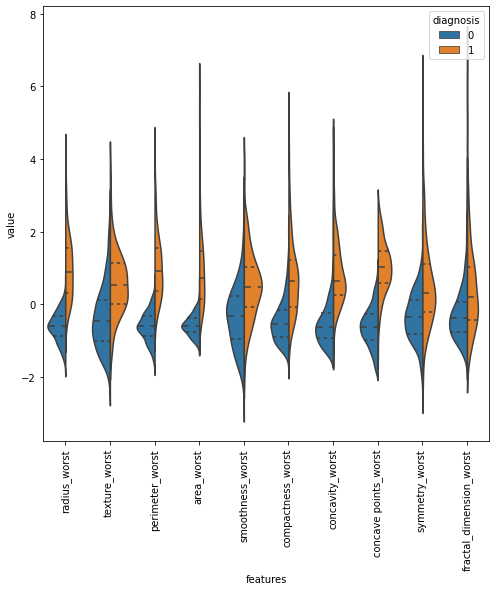

In [ ]:

data = pd.concat([y,X_norm.iloc[:,20:31]],axis=1)
data = pd.melt(data,id_vars="diagnosis",
                    var_name="features",
                    value_name='value')
plt.figure(figsize=(8,8))
sns.violinplot(x="features", y="value", hue="diagnosis", data=data,split=True, inner="quart")
plt.xticks(rotation=90)

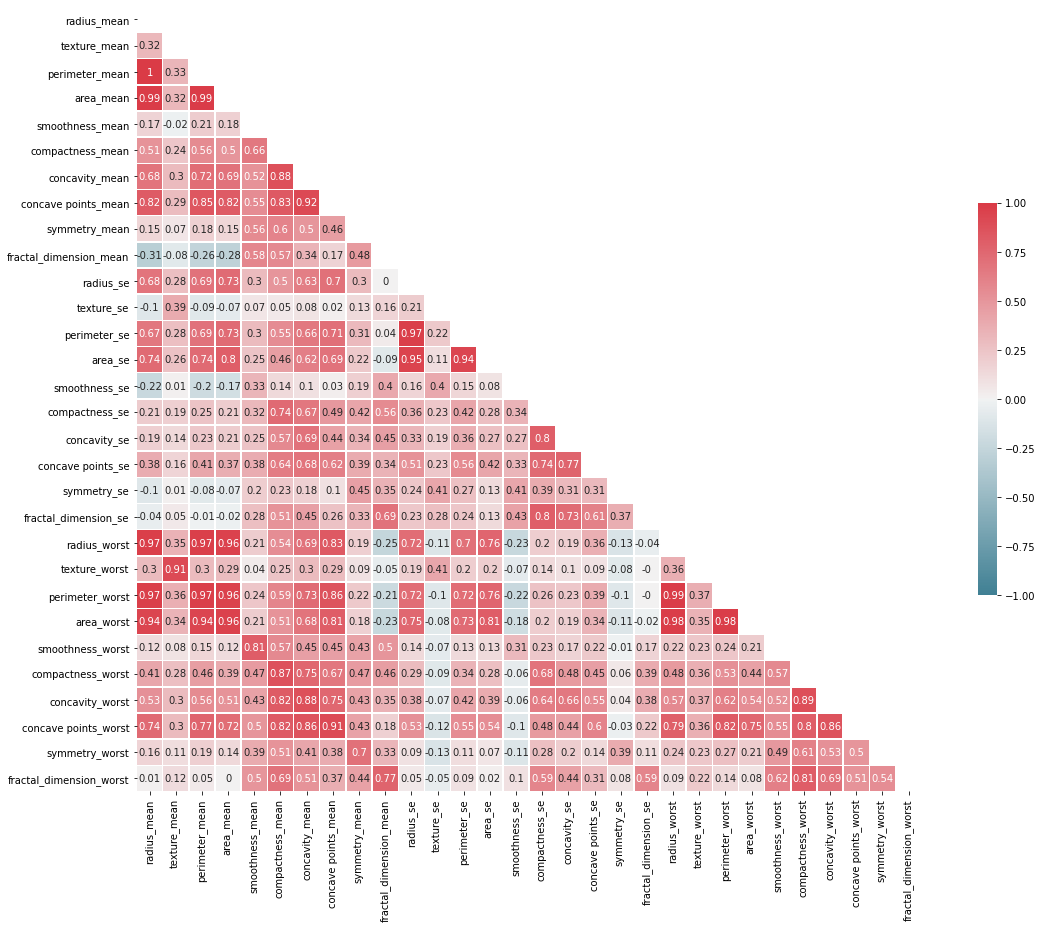

In [ ]:
corr = X.corr().round(2)

# Mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set figure size
f, ax = plt.subplots(figsize=(17, 13))

# Define custom colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap
sns.heatmap(corr, mask=mask, cmap=cmap, vmin=-1, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)

plt.tight_layout()

All the "mean" columns are highly correlated with the "worst" columns. Therefore, we should discard all the "worst" columns. Radius, peremiter and area are highly correlated, thus we will drop columns related with peremiter and area. Compactness, concavity and concave points are highly related, thus we will drop columns related with concavity and concave points.

In [ ]:
cols = ['radius_worst', 
        'texture_worst', 
        'perimeter_worst', 
        'area_worst', 
        'smoothness_worst', 
        'compactness_worst', 
        'concavity_worst',
        'concave points_worst', 
        'symmetry_worst', 
        'fractal_dimension_worst']
X_norm = X_norm.drop(cols, axis=1)

In [ ]:
cols = ['perimeter_mean',
        'perimeter_se', 
        'area_mean', 
        'area_se']
X_norm = X_norm.drop(cols, axis=1)

In [ ]:
cols = ['concavity_mean',
        'concavity_se', 
        'concave points_mean', 
        'concave points_se']
X_norm = X_norm.drop(cols, axis=1)

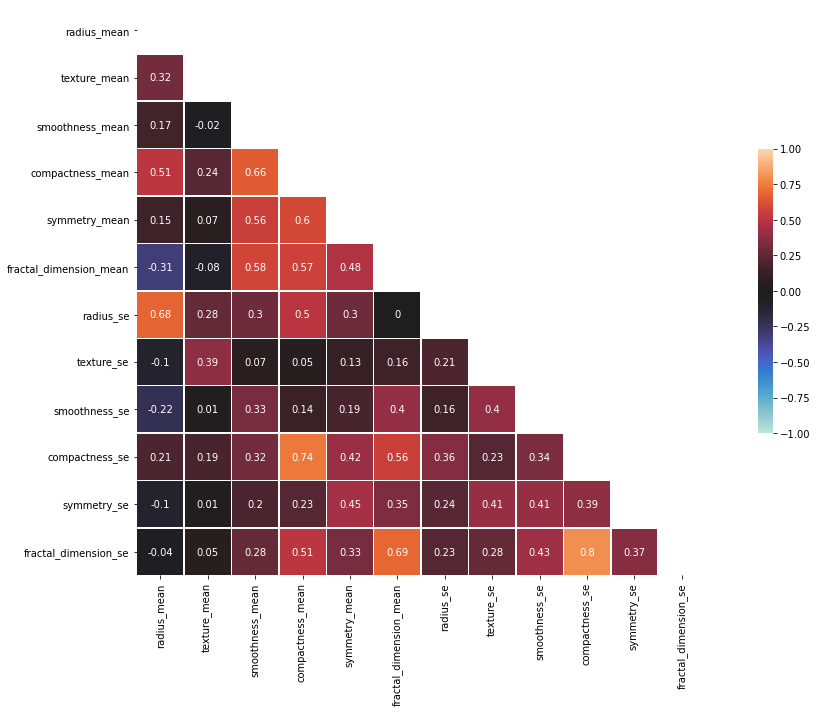

In [ ]:
corr = X_norm.corr().round(2)
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(15, 10))
sns.heatmap(corr, mask=mask, vmin=-1, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)
plt.tight_layout()

Above is the new heatmap after we delete the columns that are highly correlated, and it's obvious that the correlation between the current columns are quite low. Therefore, now we can use this data set to train models.

## Models

In [ ]:
from sklearn.model_selection import train_test_split

from sklearn.model_selection import GridSearchCV, ParameterGrid
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_norm, y, test_size=0.15, random_state=42)

### Logistic Regression

In [ ]:
parameters = {'penalty':('l1', 'l2', 'elasticnet','none'), 'C':[1, 10, 100, 1000], 'solver':('newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'), 'max_iter':[90,100,110]}
logistic = LogisticRegression()
clf = GridSearchCV(logistic, parameters)
clf.fit(X_train, y_train)

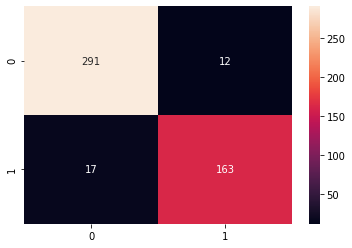

In [ ]:
logistic = LogisticRegression(penalty='l2', C=1, solver='lbfgs')
logistic.fit(X_train, y_train)
sns.heatmap(confusion_matrix(y_train, logistic.predict(X_train)), annot=True, fmt='g');

In [ ]:
# Metrics on the test set

accuracy = accuracy_score(y_test, logistic.predict(X_test))
f1 = f1_score(y_test, logistic.predict(X_test))
recall = recall_score(y_test, logistic.predict(X_test))
precision = precision_score(y_test, logistic.predict(X_test))

metrics = pd.DataFrame({'Logistic Regression':[accuracy,f1,recall,precision]}, ['Accuracy','F1 Score','Recall','Precision'])

### KNN

In [ ]:
parameters={'n_neighbors':[3,5,7,9], 'weights':('uniform', 'distance'), 'algorithm':('auto', 'ball_tree', 'kd_tree', 'brute'), 'leaf_size':[25,30,35]}
knn = KNeighborsClassifier()
clf = GridSearchCV(knn, parameters)
clf.fit(X_train, y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'algorithm': ('auto', 'ball_tree', 'kd_tree', 'brute'),
                         'leaf_size': [25, 30, 35], 'n_neighbors': [3, 5, 7, 9],
                         'weights': ('uniform', 'distance')},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

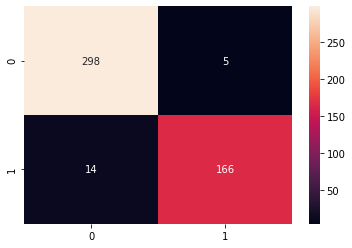

In [ ]:
knn = KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform')
knn.fit(X_train,y_train)
sns.heatmap(confusion_matrix(y_train, knn.predict(X_train)),annot=True, fmt='g');

In [ ]:
# Metrics on the test set

accuracy = accuracy_score(y_test, knn.predict(X_test))
f1 = f1_score(y_test, knn.predict(X_test))
recall = recall_score(y_test, knn.predict(X_test))
precision = precision_score(y_test, knn.predict(X_test))

metrics['KNN'] = [accuracy, f1,recall,precision]

### Decision Tree 

In [ ]:
parameters = {'max_depth': range(1,5), 'max_features': range(3,6), 'criterion': ['gini','entropy']}
dt = DecisionTreeClassifier(random_state=17)
clf = GridSearchCV(dt, parameters, cv=10)
clf.fit(X_train, y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=17,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'criterion': ['gini', 'entropy'],
                    

In [ ]:
#Visualize Tree
from sklearn.tree import export_graphviz
tree_graph = export_graphviz(clf.best_estimator_, class_names = ['benign', 'malignant'], feature_names = X_train.columns, filled=True, out_file='tree.dot')
!dot -Tpng tree.dot -o tree.png 

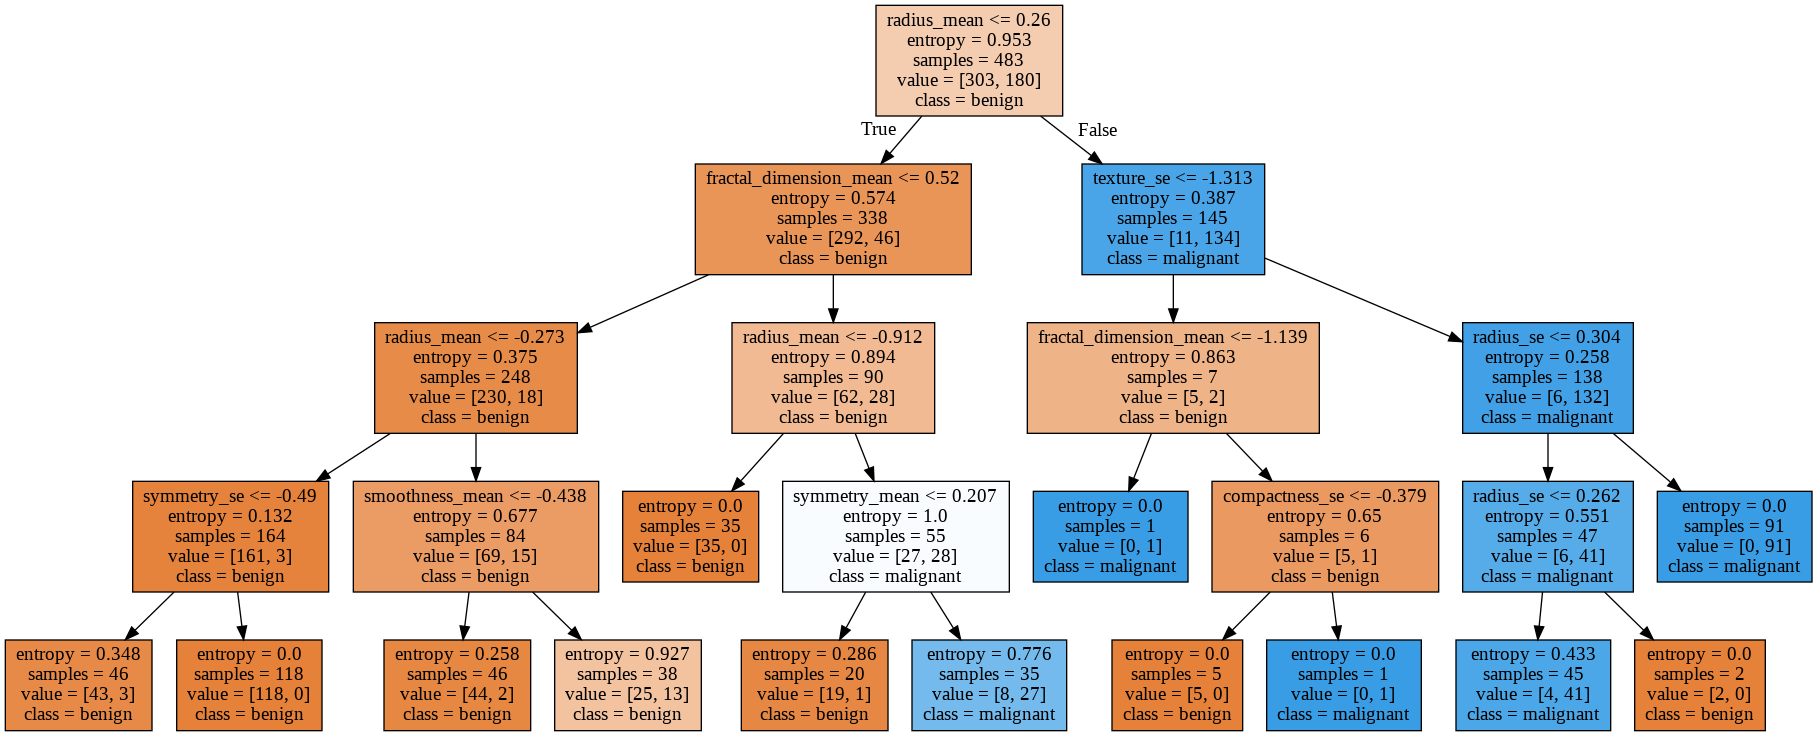

In [ ]:
from IPython.display import Image
Image(filename = 'tree.png')

Radius_mean is the root node and has the highest information gain, which is why it is split first, so size of the cell nucleus is significant in classifying benign or malignant. The second nodes are texture_se and fractal_dimension_mean, this can be interpreted as contrast in the photograph, so the less contrasted the picture is, the more probability that the cell nucleus is benign.

### Random Forest

In [ ]:
lst = list(np.arange(50,200,10))
parameters={'criterion':('gini', 'entropy'),'max_depth':lst, 'max_features':('auto', 'sqrt', 'log2')}
rf = RandomForestClassifier()
clf = GridSearchCV(rf, parameters)
clf.fit(X_train, y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              ra

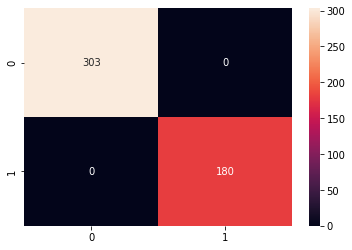

In [ ]:
rf = RandomForestClassifier(criterion='gini', max_depth=100, n_estimators=100, max_features='auto')
rf.fit(X_train, y_train)
sns.heatmap(confusion_matrix(y_train, rf.predict(X_train)),annot=True, fmt='g');

In [ ]:
# Metrics on the test set

accuracy = accuracy_score(y_test, rf.predict(X_test))
f1 = f1_score(y_test, rf.predict(X_test))
recall = recall_score(y_test, rf.predict(X_test))
precision = precision_score(y_test, rf.predict(X_test))

metrics['Random Forest'] = [accuracy, f1,recall,precision]

### Neural Network

In [ ]:
#parameters = {'hidden_layer_sizes':[(100),(100,50),(50,100),(50),(100,100)]}
parameters = {'activation':('identity', 'logistic', 'tanh', 'relu'), 'solver':('sgd', 'lbfgs', 'adam')}
nn = MLPClassifier(activation='relu',solver='adam')
clf = GridSearchCV(nn, parameters)
clf.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


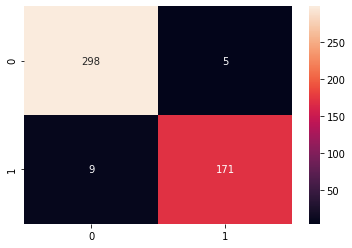

In [ ]:
nn = MLPClassifier(hidden_layer_sizes=(100,), activation='relu',solver='adam')
nn.fit(X_train,y_train)
sns.heatmap(confusion_matrix(y_train, nn.predict(X_train)),annot=True, fmt='g');

In [ ]:
# Metrics on the test set

accuracy = accuracy_score(y_test, nn.predict(X_test))
f1 = f1_score(y_test, nn.predict(X_test))
recall = recall_score(y_test, nn.predict(X_test))
precision = precision_score(y_test, nn.predict(X_test))

metrics['Neural Network'] = [accuracy, f1,recall,precision]

### SVM

In [ ]:
parameters={'kernel':('linear', 'poly', 'rbf', 'sigmoid'), 'gamma':('scale', 'auto'), 'C':[1,10,100,1000]}
svm = SVC()
clf = GridSearchCV(svm, parameters)
clf.fit(X_train, y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [1, 10, 100, 1000], 'gamma': ('scale', 'auto'),
                         'kernel': ('linear', 'poly', 'rbf', 'sigmoid')},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

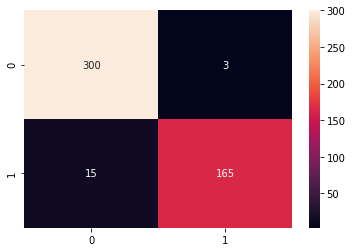

In [ ]:
svm = SVC(C=1, gamma='scale', kernel='rbf', probability=True)
svm.fit(X_train,y_train)
sns.heatmap(confusion_matrix(y_train, svm.predict(X_train)),annot=True, fmt='g');

In [ ]:
# Metrics on the test set

accuracy = accuracy_score(y_test, svm.predict(X_test))
f1 = f1_score(y_test, svm.predict(X_test))
recall = recall_score(y_test, svm.predict(X_test))
precision = precision_score(y_test, svm.predict(X_test))

metrics['SVM'] = [accuracy, f1,recall,precision]

### AdaBoost

In [ ]:
parameters={'algorithm':('SAMME', 'SAMME.R'), 'n_estimators':[45,50,55], 'learning_rate':[.05,.1,.5,1]}
ab = AdaBoostClassifier()
clf = GridSearchCV(ab, parameters)
clf.fit(X_train, y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=AdaBoostClassifier(algorithm='SAMME.R',
                                          base_estimator=None,
                                          learning_rate=1.0, n_estimators=50,
                                          random_state=None),
             iid='deprecated', n_jobs=None,
             param_grid={'algorithm': ('SAMME', 'SAMME.R'),
                         'learning_rate': [0.05, 0.1, 0.5, 1],
                         'n_estimators': [45, 50, 55]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

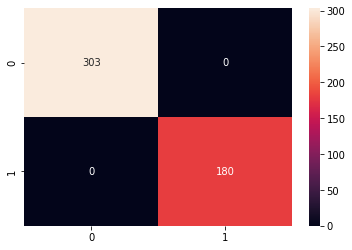

In [ ]:
ab = AdaBoostClassifier(algorithm='SAMME.R', learning_rate=1.0, n_estimators=50)
ab.fit(X_train,y_train)
sns.heatmap(confusion_matrix(y_train, ab.predict(X_train)), annot=True, fmt='g');

In [ ]:
# Metrics on the test set

accuracy = accuracy_score(y_test, ab.predict(X_test))
f1 = f1_score(y_test, ab.predict(X_test))
recall = recall_score(y_test, ab.predict(X_test))
precision = precision_score(y_test, ab.predict(X_test))

metrics['AdaBoost'] = [accuracy, f1,recall,precision]

### Results

In [ ]:
metrics

,Logistic Regression,KNN,Random Forest,Neural Network,SVM,AdaBoost
Accuracy,0.953488,0.872093,0.930233,0.965116,0.941860,0.941860
F1 Score,0.935484,0.813559,0.903226,0.952381,0.915254,0.918033
Recall,0.906250,0.750000,0.875000,0.937500,0.843750,0.875000
Precision,0.966667,0.888889,0.933333,0.967742,1.000000,0.965517


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


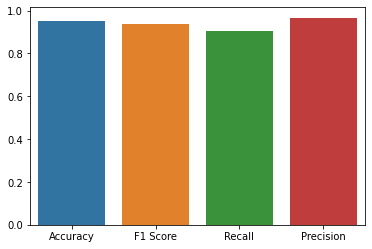

In [ ]:
sns.barplot(metrics['Logistic Regression'].index, metrics['Logistic Regression'].values)

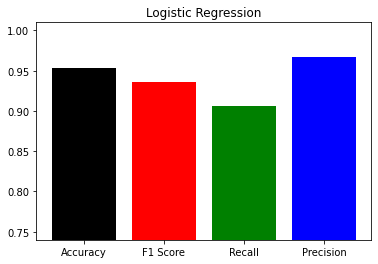

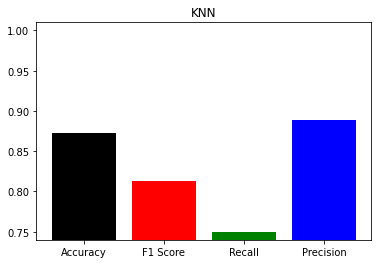

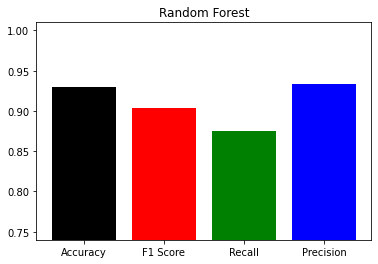

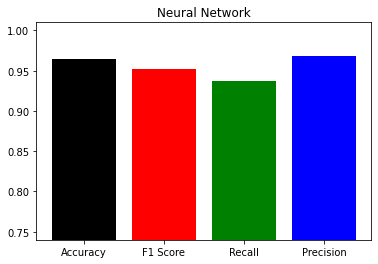

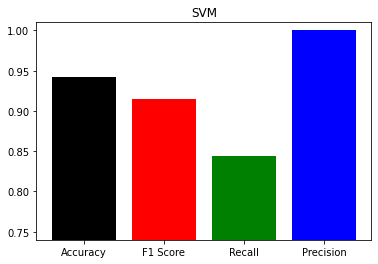

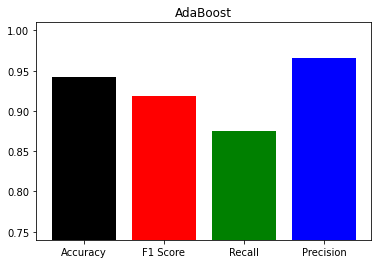

In [ ]:
plt.bar(metrics['Logistic Regression'].index, metrics['Logistic Regression'].values,color=['black', 'red', 'green', 'blue'])
plt.ylim(.74,1.01)
plt.title("Logistic Regression")
plt.show();
plt.bar(metrics['KNN'].index, metrics['KNN'].values,color=['black', 'red', 'green', 'blue'])
plt.ylim(.74,1.01)
plt.title("KNN")
plt.show();
plt.bar(metrics['Random Forest'].index, metrics['Random Forest'].values,color=['black', 'red', 'green', 'blue'])
plt.ylim(.74,1.01)
plt.title("Random Forest")
plt.show();
plt.bar(metrics['Neural Network'].index, metrics['Neural Network'].values,color=['black', 'red', 'green', 'blue'])
plt.ylim(.74,1.01)
plt.title("Neural Network")
plt.show();
plt.bar(metrics['SVM'].index, metrics['SVM'].values,color=['black', 'red', 'green', 'blue'])
plt.ylim(.74,1.01)
plt.title("SVM")
plt.show();
plt.bar(metrics['AdaBoost'].index, metrics['AdaBoost'].values,color=['black', 'red', 'green', 'blue'])
plt.ylim(.74,1.01)
plt.title('AdaBoost')
plt.show();

After training through GridSearch corss validation and evaluating the models on the test set, it appears that both logisitcs regression and the neural network performed the best, with a F1 score of 90.63%.

## Clustering ##

In [ ]:
from sklearn.preprocessing import StandardScaler
X_scaled = StandardScaler().fit_transform(X) 

### Principal Component Analysis ###

In [ ]:
from sklearn.decomposition import PCA # Principal Component Analysis module

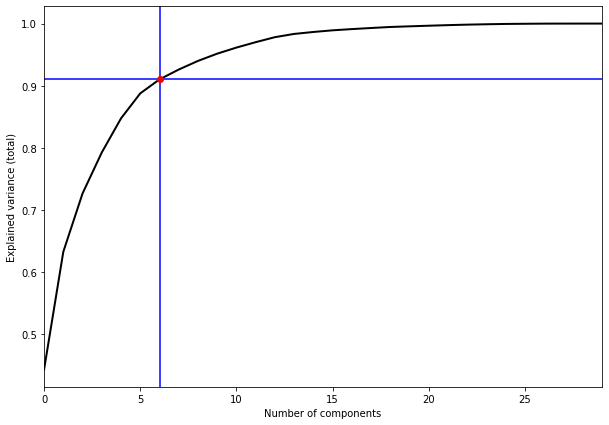

In [ ]:
#Let's graph how many components is the ideal amount. 
# This can be determined by seeing how many components can explain 90% of the initial data dispersion (quantified by the explained_variance_ratio)
decomp = PCA().fit(X_scaled)

plt.figure(figsize=(10,7))
plt.plot(np.cumsum(decomp.explained_variance_ratio_), color='k', lw=2)
plt.xlabel('Number of components')
plt.ylabel('Explained variance (total)')
plt.xlim(0, 29)
plt.yticks(np.arange(0, 1.1, 0.1))
plt.axvline(6, c='b')
plt.axhline(0.91, c='b')
plt.plot(6, 0.91, 'ro')
plt.show();

We see that 6 components capture 91% of the data variance.

In [ ]:
pca = PCA(n_components=6)
pca_results = pca.fit_transform(X_scaled) 

In [ ]:
feat_imp = pd.DataFrame(pca.components_)

feat_imp.columns = X.columns
feat_imp

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,0.218902,0.103725,0.227537,0.220995,0.142590,0.239285,0.258400,0.260854,0.138167,0.064363,0.205979,0.017428,0.211326,0.202870,0.014531,0.170393,0.153590,0.183417,0.042498,0.102568,0.227997,0.104469,0.236640,0.224871,0.127953,0.210096,0.228768,0.250886,0.122905,0.131784
1,-0.233857,-0.059706,-0.215181,-0.231077,0.186113,0.151892,0.060165,-0.034768,0.190349,0.366575,-0.105552,0.089980,-0.089457,-0.152293,0.204430,0.232716,0.197207,0.130322,0.183848,0.280092,-0.219866,-0.045467,-0.199878,-0.219352,0.172304,0.143593,0.097964,-0.008257,0.141883,0.275339
2,-0.008531,0.064550,-0.009314,0.028700,-0.104292,-0.074092,0.002734,-0.025564,-0.040240,-0.022574,0.268481,0.374634,0.266645,0.216007,0.308839,0.154780,0.176464,0.224658,0.288584,0.211504,-0.047507,-0.042298,-0.048547,-0.011902,-0.259798,-0.236076,-0.173057,-0.170344,-0.271313,-0.232791
3,0.041409,-0.603050,0.041983,0.053434,0.159383,0.031795,0.019123,0.065336,0.067125,0.048587,0.097941,-0.359856,0.088992,0.108205,0.044664,-0.027469,0.001317,0.074067,0.044073,0.015305,0.015417,-0.632808,0.013803,0.025895,0.017652,-0.091328,-0.073951,0.006007,-0.036251,-0.077053
4,0.037786,-0.049469,0.037375,0.010331,-0.365089,0.011704,0.086375,-0.043861,-0.305941,-0.044424,-0.154456,-0.191651,-0.120990,-0.127574,-0.232066,0.279968,0.353982,0.195548,-0.252869,0.263298,-0.004407,-0.092883,0.007454,-0.027391,-0.324435,0.121804,0.188519,0.043332,-0.244559,0.094423
5,0.018741,-0.032179,0.017308,-0.001888,-0.286375,-0.014131,-0.009344,-0.052050,0.356459,-0.119431,-0.025603,-0.028747,0.001811,-0.042864,-0.342917,0.069198,0.056343,-0.031224,0.490246,-0.053195,-0.000291,-0.050008,0.008501,-0.025164,-0.369255,0.047706,0.028379,-0.030873,0.498927,-0.080224


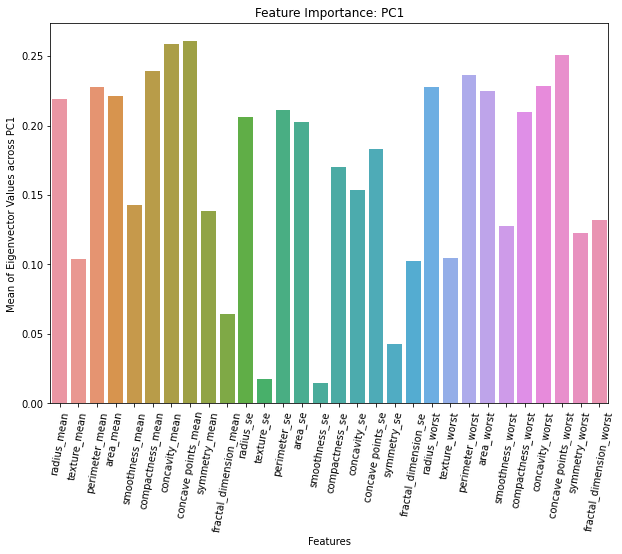

In [ ]:
plt.figure(figsize=(10,7))
sns.barplot(x = feat_imp.columns, y = abs(feat_imp.iloc[0,:])).set_title('Feature Importance: PC1')
plt.ylabel('Mean of Eigenvector Values across PC1')
plt.xlabel('Features')
plt.xticks(rotation=80);

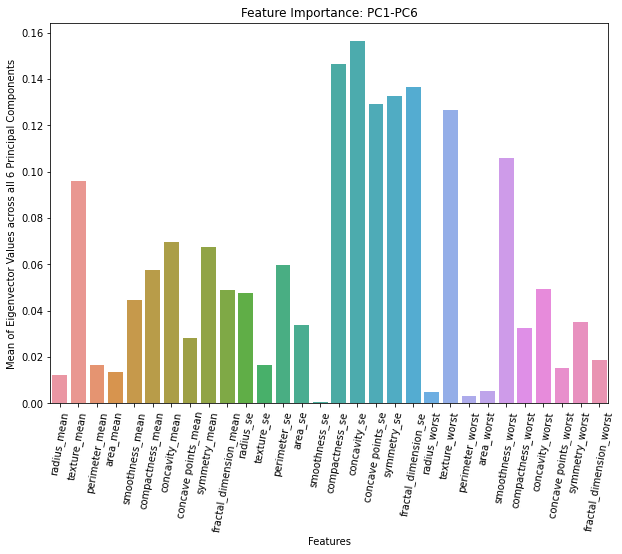

In [ ]:
plt.figure(figsize=(10,7))
sns.barplot(x = feat_imp.columns, y = abs(feat_imp.mean(axis=0))).set_title('Feature Importance: PC1-PC6')
plt.ylabel('Mean of Eigenvector Values across all 6 Principal Components')
plt.xlabel('Features')
plt.xticks(rotation=80);

It looks like the standard error features, specifically from compactness to fractal dimension, have the highest mean of eigen vector values across the six principal components, the higher magnitude of eigenvector values indicateds greater feature importance.

### TSNE ###

In [ ]:
from sklearn.manifold import TSNE # TSNE module

tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=2000)
tsne_results = tsne.fit_transform(X_scaled)

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 569 samples in 0.001s...
[t-SNE] Computed neighbors for 569 samples in 0.036s...
[t-SNE] Computed conditional probabilities for sample 569 / 569
[t-SNE] Mean sigma: 1.522404
[t-SNE] KL divergence after 250 iterations with early exaggeration: 65.141022
[t-SNE] KL divergence after 1750 iterations: 0.879927


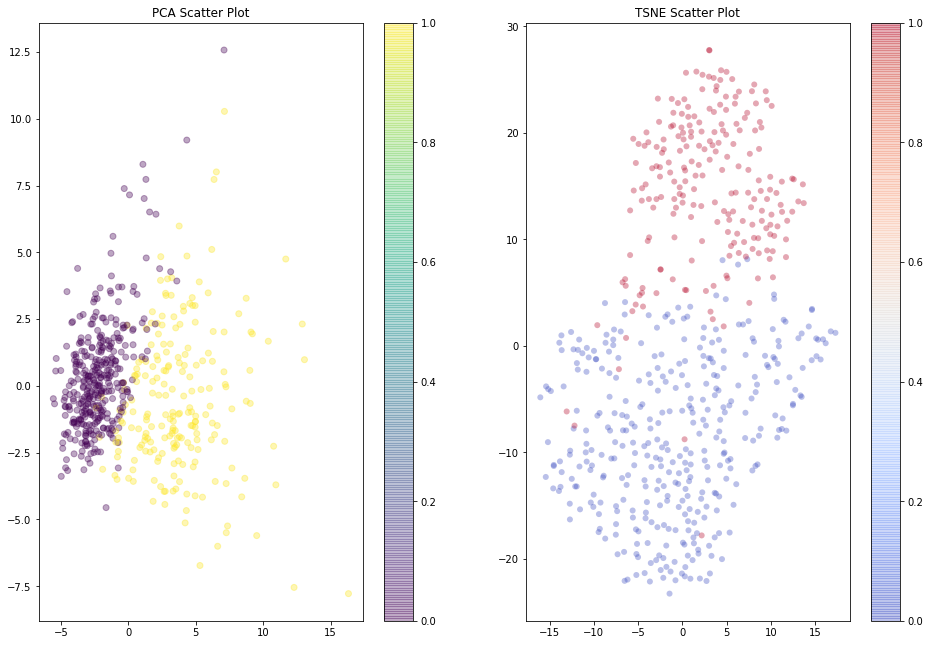

In [ ]:
#Visualization 
plt.figure(figsize = (16,11))
plt.subplot(121)
plt.scatter(pca_results[:,0],pca_results[:,1], c = y,  alpha=0.35) #pca_results[:,2]
plt.colorbar()
plt.title('PCA Scatter Plot')
plt.subplot(122)
plt.scatter(tsne_results[:,0],tsne_results[:,1],  c = y, cmap = "coolwarm", edgecolor = "None", alpha=0.35)
plt.colorbar()
plt.title('TSNE Scatter Plot')
plt.show()

In [ ]:
#PCA and visualization on the feature engineered dataset (X_norm?)

pca2 = PCA(n_components=6)
pca2_results = pca2.fit_transform(X_norm) 

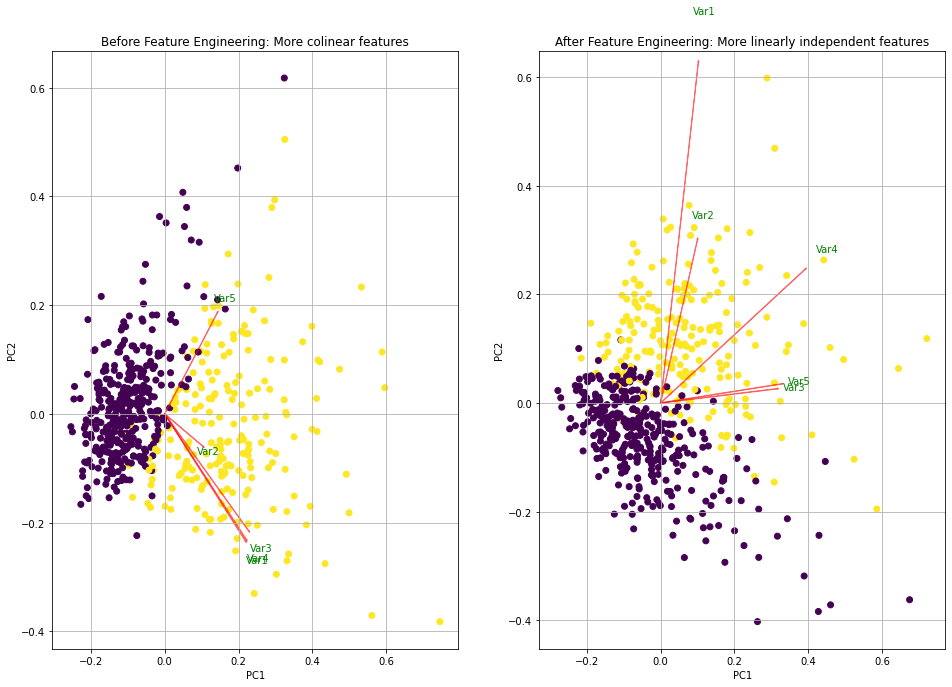

In [ ]:
def plotvectors(score,coeff,labels=None):
    #Author of function: Serafeim Loukas, serafeim.loukas@epfl.ch
    xs = score[:,0]
    ys = score[:,1]
    n = coeff.shape[0]
    scalex = 1.0/(xs.max() - xs.min())
    scaley = 1.0/(ys.max() - ys.min())
    plt.scatter(xs * scalex,ys * scaley, c = y)
    for i in range(5):
        plt.arrow(0, 0, coeff[i,0], coeff[i,1],color = 'r',alpha = 0.5)
        if labels is None:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, "Var"+str(i+1), color = 'g', ha = 'center', va = 'center')
        else:
 
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, labels[i], color = 'g', ha = 'center', va = 'center')

plt.figure(figsize = (16,11))

plt.subplot(121)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Before Feature Engineering: More colinear features')
plt.grid()
plotvectors(pca_results[:,0:2], np.transpose(pca.components_[0:2, :]))

plt.subplot(122)
plt.title('After Feature Engineering: More linearly independent features')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.grid()
plotvectors(pca2_results[:,0:2], np.transpose(pca2.components_[0:2, :]))

plt.show()

In [ ]:
#Feature Importance Analysis for Feature Engineered Dataset

feat_imp2 = pd.DataFrame(pca2.components_)

feat_imp2.columns = X_norm.columns
feat_imp2

,radius_mean,texture_mean,smoothness_mean,compactness_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,smoothness_se,compactness_se,symmetry_se,fractal_dimension_se
0,0.102175,0.099877,0.315750,0.391959,0.327629,0.345465,0.242817,0.175909,0.240624,0.390308,0.265375,0.359165
1,0.626716,0.300359,0.026245,0.246205,0.035123,-0.318420,0.424388,-0.116205,-0.298288,0.013422,-0.194112,-0.180656
2,-0.015057,0.457419,-0.320428,-0.237940,-0.184454,-0.234746,0.168064,0.621224,0.249477,0.012351,0.254755,0.025824
3,-0.021623,0.239535,-0.364724,0.119844,-0.366780,0.144354,-0.209110,-0.108632,-0.207535,0.434588,-0.372517,0.461703
4,0.191186,-0.591455,-0.331504,-0.115751,-0.198837,-0.229823,0.351713,-0.222491,0.151522,0.213667,0.320855,0.230686
5,0.079083,-0.067640,0.358669,-0.021705,-0.450062,0.032883,0.196381,0.017810,0.599571,-0.107545,-0.495906,0.023704


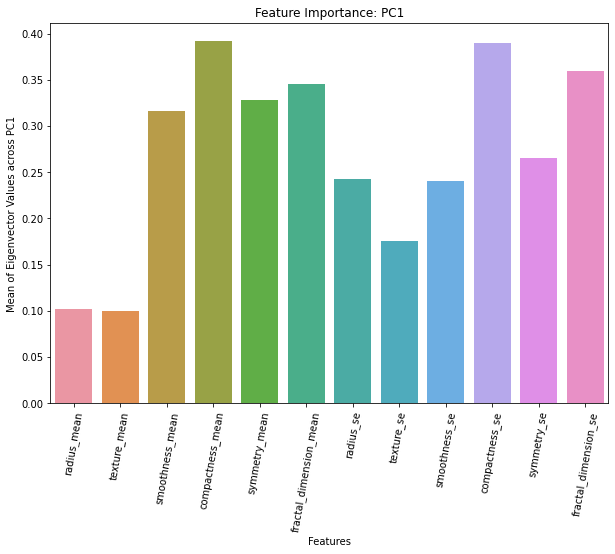

In [ ]:
plt.figure(figsize=(10,7))
sns.barplot(x = feat_imp2.columns, y = abs(feat_imp2.iloc[0,:])).set_title('Feature Importance: PC1')
plt.ylabel('Mean of Eigenvector Values across PC1')
plt.xlabel('Features')
plt.xticks(rotation=80);

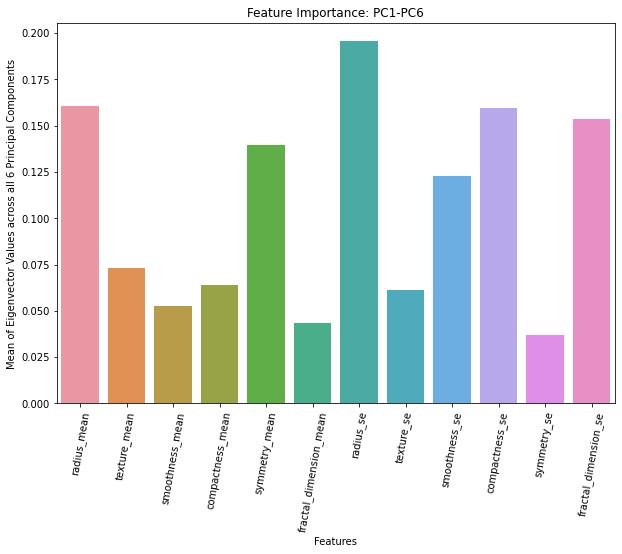

In [ ]:
plt.figure(figsize=(10,7))
sns.barplot(x = feat_imp2.columns, y = abs(feat_imp2.mean(axis=0))).set_title('Feature Importance: PC1-PC6')
plt.ylabel('Mean of Eigenvector Values across all 6 Principal Components')
plt.xlabel('Features')
plt.xticks(rotation=80);

It is clear that radius_se is the most important feature across all 6 principal components in the cleaned and reduced dataset (after feature engineering).  